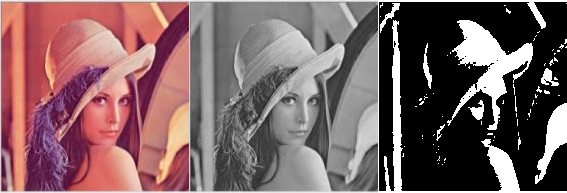

-1

In [174]:
# Desafio - Transformar uma imagem colorida para níveis de cinza (0 a 255) e para binarizada (0 e 255), ou seja, preto e branco.  
from PIL import Image
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

ENT_DIR = "entrada"
SAI_DIR = "saida"

# Função para o diretório de entrada
def ent_arq(arquivo):
   return os.path.join(ENT_DIR, arquivo)

# Função para o diretório de saída
def sai_arq(arquivo):
   return os.path.join(SAI_DIR, arquivo)

# abre a imagem informada
#imagem = Image.open(ent_arq("/content/desafiocorbincin/entrada/lena.jpg"))

# função para percorrer a largura e altura da imagem, pixel a pixel obtendo os valores rgb de cada um e substituindo os pixels da imagem colorida de modo a deixar a mesma em
# escala de tons de cinza
def escala_cinza(colored):
   w, h = colored.size
   img = Image.new("RGB", (w, h))

   for x in range(w):
       for y in range(h):
         pixel = colored.getpixel((x,y))
         luminancia = (pixel[0] + pixel[1] + pixel[2])//3
         img.putpixel((x,y), (luminancia, luminancia, luminancia))
   return img      


# função para percorrer a imagem,  mesclando pixels
def pblena(size):
   WHITE = (255, 255, 255)
   BLACK  = (0, 0, 0)

   image = Image.new("RGB", (size, size), WHITE)
   for x in range(size):
       for y in range(size):
          if x < y:
              image.putpixel((x,y), BLACK)
   return image      

lena_colorida = Image.open(ent_arq("/content/desafiocorbincin/entrada/lena.jpg"))
pblena = escala_cinza(lena_colorida)
pblena.save(sai_arq("/content/desafiocorbincin/saida/lena_cinza.jpg"))

img = cv2.imread("/content/desafiocorbincin/entrada/lena.jpg")
imgcz = cv2.imread("/content/desafiocorbincin/saida/lena_cinza.jpg")
(T, bin) = cv2.threshold(imgcz, 160, 255, cv2.THRESH_BINARY)
resultado = np.vstack([np.hstack([img,pblena,bin])])



# exibe as imagens (colorida, escala de cinza, preto e branco)

cv2_imshow(resultado)
cv2.waitKey(0)